In [1]:
%pylab inline
import h5py
import seaborn as sns
sns.set()
import itertools
from tqdm import tqdm

Populating the interactive namespace from numpy and matplotlib


In [33]:
cd /home/chenxupeng/projects/deepshape/

/home/chenxupeng/projects/deepshape


In [9]:
with h5py.File('data/new/Spitale_2015_invivo_CDS_0.1', 'r') as f:
    X_train = f['X_train'][:]
    X_test = f['X_test'][:]
   # name_train = f['names_train'][:]
   # name_test = f['names_test'][:10]
   # offset = f['offset'][()]
   # y_test = f['y_test'][:10]
    y_train = f['y_train'][:]

In [22]:
np.percentile(np.sum(~np.isnan(y_train),axis=1),85)

18.0

In [27]:
pick_index = np.where(np.sum(~np.isnan(y_train),axis=1) >=18)[0]

In [35]:
with h5py.File('data/new/Spitale_2015_invivo_CDS_pick') as f:
    f.create_dataset('X_train',data = X_train[pick_index])
    f.create_dataset('y_train',data = y_train[pick_index])

In [39]:
from tqdm import tqdm

In [40]:
images = np.ndarray([11270,128,128,16])
for i in tqdm(range(11270)):
    images[i] = convert_to_image(X_train[pick_index][i])

100%|██████████| 11270/11270 [01:11<00:00, 157.57it/s]


In [41]:
with h5py.File('data/new/images_pick') as f:
    f.create_dataset('X_train',data = images)
    f.create_dataset('y_train',data = y_train[pick_index])

In [6]:
#将每一个100长的均转成100*100*16的矩阵

In [36]:
def convert_to_image(x):
    m = (np.repeat(x, 4, axis=1)[np.newaxis, :, :]*np.tile(x, 4)[:, np.newaxis, :])
    return m

In [12]:
trainimgs = {}
imgs_train = {}
for i in range(9):
    if i <8:
        trainimgs[i] = X_train[i*100000:(i+1)*100000,:,:]
        imgs_train[i] = np.ndarray([100000,100,100,16])
    else:
        trainimgs[i] = X_train[i*100000:,:,:]
        imgs_train[i] = np.ndarray([96628,100,100,16])

In [16]:
for i in tqdm(range(1)):
    if i <8:
        for j in tqdm(range(100000)):
            imgs_train[i][j] = convert_to_image(trainimgs[i][j])
    else:
        for j in tqdm(range(96628)):
            imgs_train[i][j] = convert_to_image(trainimgs[i][j])



  0%|          | 0/1 [00:00<?, ?it/s]


  0%|          | 0/100000 [00:00<?, ?it/s]


  0%|          | 145/100000 [00:00<01:09, 1443.20it/s]


  0%|          | 329/100000 [00:00<01:04, 1542.86it/s]


  1%|          | 515/100000 [00:00<01:01, 1624.19it/s]


  1%|          | 701/100000 [00:00<00:58, 1685.47it/s]


  1%|          | 887/100000 [00:00<00:57, 1732.42it/s]



  1%|          | 1069/100000 [00:00<00:56, 1755.62it/s]


  1%|▏         | 1324/100000 [00:00<00:50, 1935.17it/s]


  2%|▏         | 1596/100000 [00:00<00:46, 2115.03it/s]


  2%|▏         | 1866/100000 [00:00<00:43, 2260.72it/s]


  2%|▏         | 2137/100000 [00:01<00:41, 2375.99it/s]


  2%|▏         | 2408/100000 [00:01<00:39, 2465.81it/s]


  3%|▎         | 2680/100000 [00:01<00:38, 2532.94it/s]


  3%|▎         | 2953/100000 [00:01<00:37, 2588.18it/s]


  3%|▎         | 3228/100000 [00:01<00:36, 2633.36it/s]


  4%|▎         | 3503/100000 [00:01<00:36, 2664.78it/s]


  4%|▍         | 3779/100000 [00:01<00:35, 2690

 49%|████▊     | 48631/100000 [00:24<00:34, 1505.03it/s]


 49%|████▉     | 48782/100000 [00:24<00:34, 1499.80it/s]


 49%|████▉     | 48934/100000 [00:24<00:33, 1504.49it/s]


 49%|████▉     | 49085/100000 [00:24<00:33, 1503.08it/s]


 49%|████▉     | 49236/100000 [00:24<00:33, 1500.11it/s]


 49%|████▉     | 49388/100000 [00:24<00:33, 1505.16it/s]


 50%|████▉     | 49539/100000 [00:24<00:33, 1502.83it/s]


 50%|████▉     | 49690/100000 [00:25<00:33, 1504.01it/s]


 50%|████▉     | 49841/100000 [00:25<00:33, 1503.37it/s]


 50%|████▉     | 49992/100000 [00:25<00:33, 1504.45it/s]


 50%|█████     | 50143/100000 [00:25<00:33, 1502.84it/s]


 50%|█████     | 50294/100000 [00:25<00:33, 1503.23it/s]


 50%|█████     | 50445/100000 [00:25<00:32, 1502.62it/s]


 51%|█████     | 50596/100000 [00:25<00:32, 1500.40it/s]


 51%|█████     | 50748/100000 [00:25<00:32, 1504.94it/s]


 51%|█████     | 50899/100000 [00:25<00:32, 1501.16it/s]


 51%|█████     | 51050/100000 [00:25<00:32, 1502.15it/s]

 85%|████████▍ | 84891/100000 [00:48<00:10, 1500.63it/s]


 85%|████████▌ | 85043/100000 [00:48<00:09, 1504.60it/s]


 85%|████████▌ | 85194/100000 [00:48<00:09, 1503.53it/s]


 85%|████████▌ | 85345/100000 [00:48<00:09, 1504.71it/s]


 85%|████████▌ | 85496/100000 [00:48<00:09, 1505.49it/s]


 86%|████████▌ | 85647/100000 [00:48<00:09, 1503.30it/s]


 86%|████████▌ | 85798/100000 [00:49<00:09, 1502.91it/s]


 86%|████████▌ | 85949/100000 [00:49<00:09, 1502.57it/s]


 86%|████████▌ | 86100/100000 [00:49<00:09, 1499.30it/s]


 86%|████████▋ | 86251/100000 [00:49<00:09, 1499.56it/s]


 86%|████████▋ | 86402/100000 [00:49<00:09, 1502.19it/s]


 87%|████████▋ | 86554/100000 [00:49<00:08, 1501.75it/s]


 87%|████████▋ | 86705/100000 [00:49<00:08, 1502.91it/s]


 87%|████████▋ | 86857/100000 [00:49<00:08, 1502.50it/s]


 87%|████████▋ | 87008/100000 [00:49<00:08, 1503.69it/s]


 87%|████████▋ | 87160/100000 [00:49<00:08, 1503.11it/s]


 87%|████████▋ | 87311/100000 [00:50<00:08, 1501.71it/s]

In [18]:
imgs_train[0].shape

(100000, 100, 100, 16)

In [19]:
with h5py.File('/home/chenxupeng/projects/deepshape/data/new/test') as t:
    t.create_dataset('test',data = imgs_train[0])

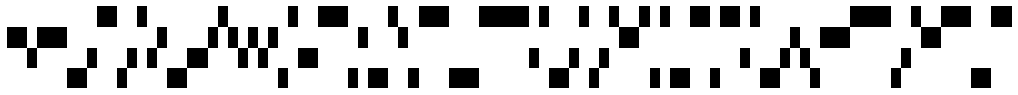

In [53]:
fig, ax = plt.subplots(figsize=(18, 1.5))
sns.heatmap(x.T, cmap=cm.Greys, 
            xticklabels=False, 
            yticklabels=False, cbar=False, ax=ax)

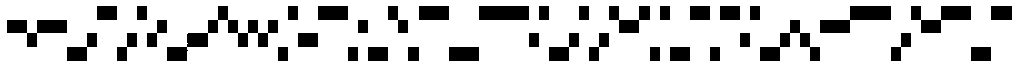

In [6]:
fig, ax = plt.subplots(figsize=(18, 1))
sns.heatmap(np.repeat(x, 4, axis=1).T, cmap=cm.Greys, 
            xticklabels=False, 
            yticklabels=False, cbar=False, ax=ax)

In [7]:
np.tile(x, 4).shape

(100, 16)

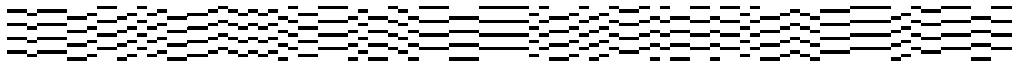

In [8]:
fig, ax = plt.subplots(figsize=(18, 1))
sns.heatmap(np.tile(x, 4).T, cmap=cm.Greys, 
            xticklabels=False, 
            yticklabels=False, cbar=False, ax=ax)

In [9]:
m = (np.repeat(x, 4, axis=1)[np.newaxis, :, :]*np.tile(x, 4)[:, np.newaxis, :])

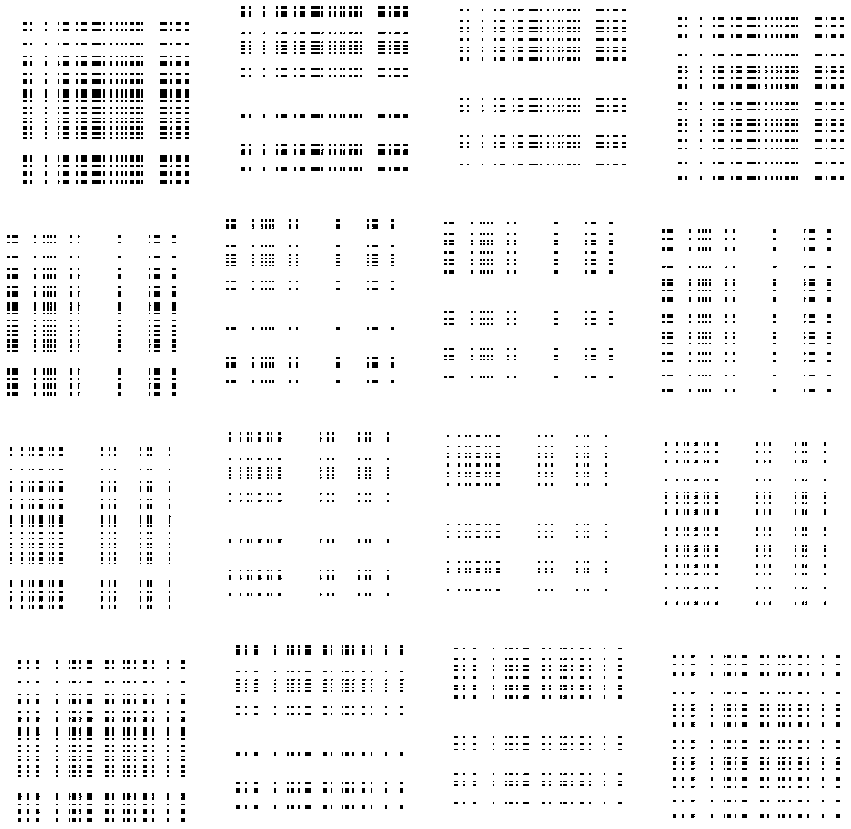

In [50]:
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
for n, (i, j) in enumerate(itertools.product(range(4), range(4))):
    sns.heatmap(convert_to_image(X_train[3])[:, :, n], cmap=cm.Greys, 
            xticklabels=False, 
            yticklabels=False, cbar=False, ax=axes[i, j])

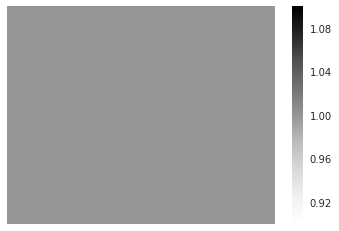

In [11]:
sns.heatmap(np.sum(m, axis=2), cmap=cm.Greys, 
            xticklabels=False, 
            yticklabels=False)

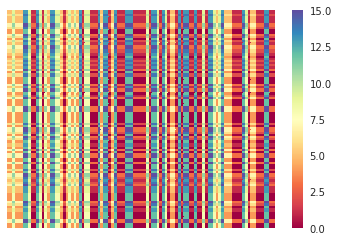

In [12]:
sns.heatmap(np.argmax(m, axis=2), cmap=cm.Spectral, 
            xticklabels=False, 
            yticklabels=False)